# **Problem Set 9**

Daniel de Castro

November 12, 2021

### Problem 1

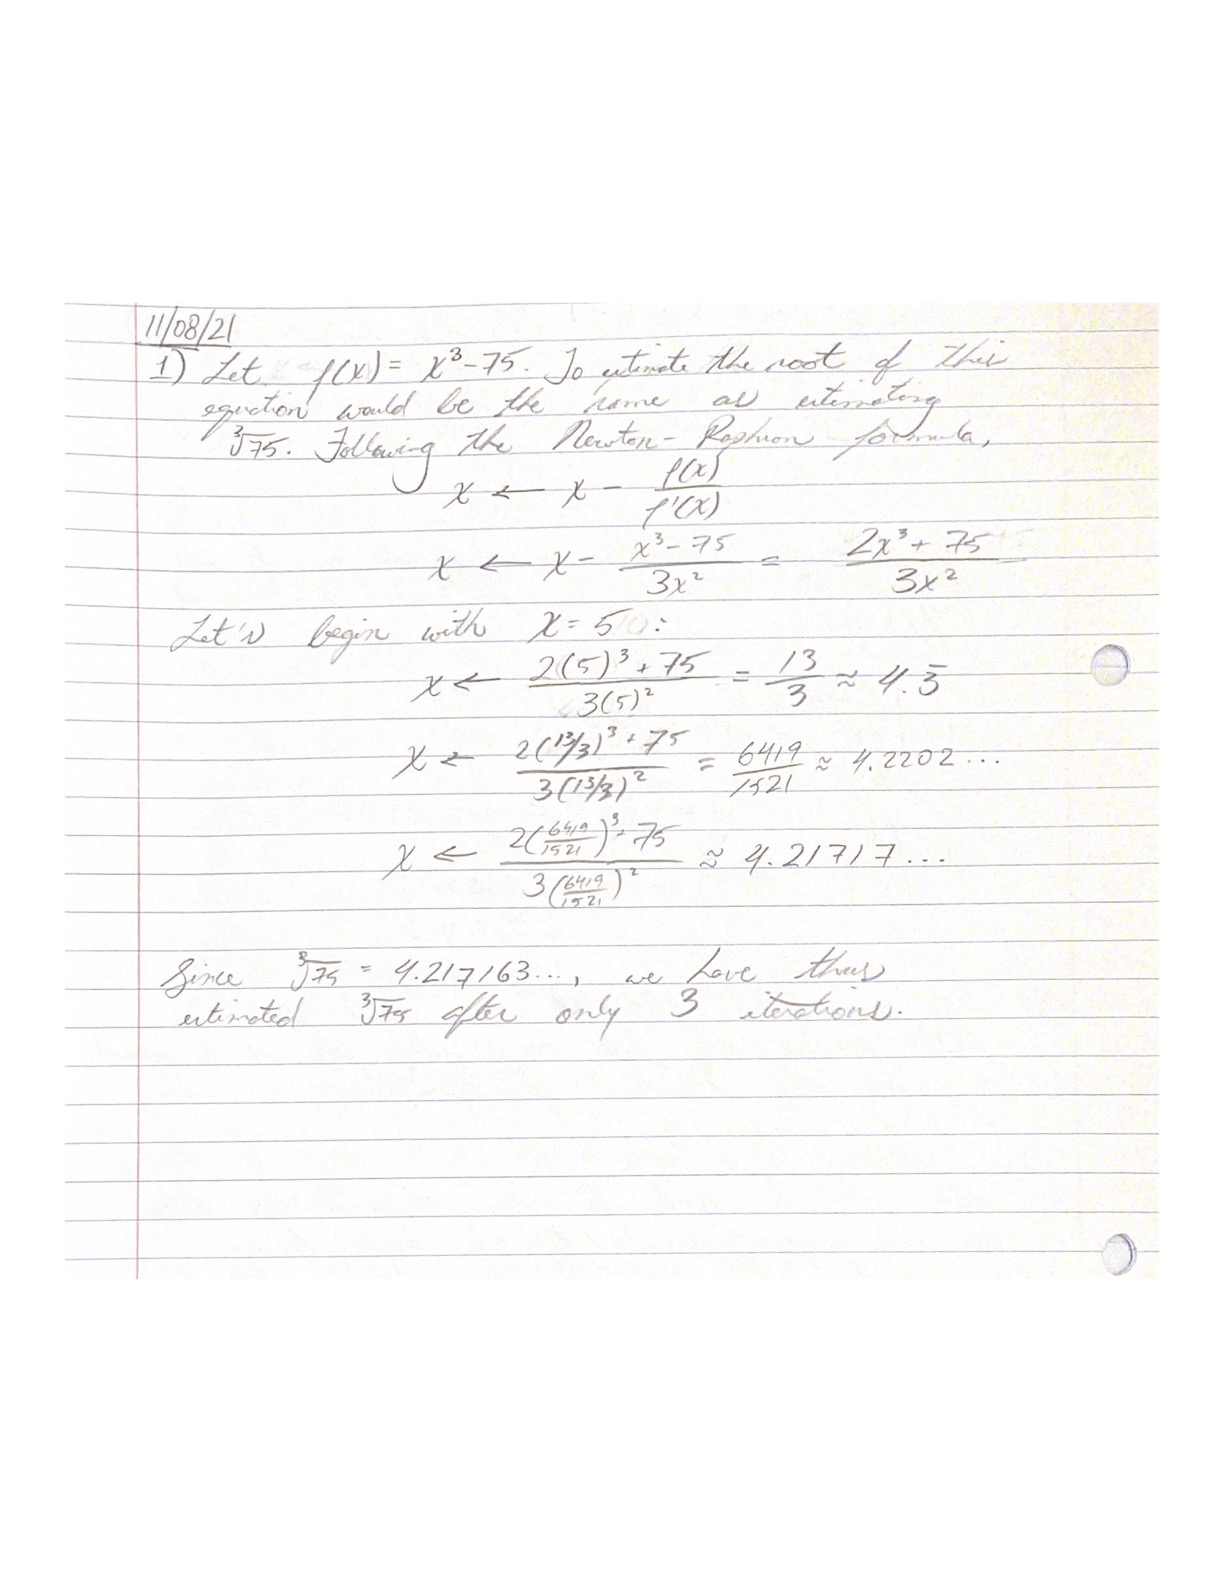

### Problem 2

First, we plot the function $f(x) = x^3 - 3.23x^2 - 5.54x + 9.84$ to find a reasonable range of x-values for the smallest positive root. 

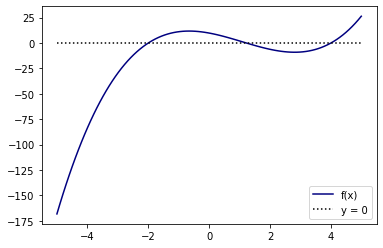

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

f = lambda x: x**3 - 3.23 * x**2 - 5.54 * x + 9.84
g = lambda x: 0 * x

x = np.linspace(-5,5,100)

ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, g(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
plt.show()

We now adjust the domain `x` of our plot in order to get a better idea of where the smallest positive root lies.

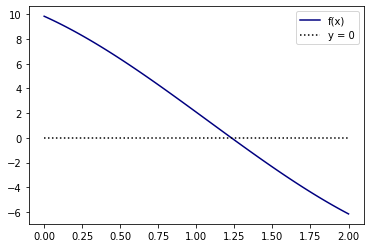

In [25]:
fig, ax = plt.subplots()

# We adjust the parameters of np.linspace to condense the domain x
x = np.linspace(0,2,100)
ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, g(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
plt.show()

It appears that a reasonable bracket for $x_*$, the smallest positive root of $f(x)$, is the interval $(1, 2)$. Below, we write and then execute a function to estimate this root using bisection. 

Note that we set $\epsilon = 0.0001$; we stop the process of bisection when $|x_k - x_{k+1}| < \epsilon$. 

In [26]:
eps = 0.0001

def bisection(x_1, x_2, f):
  if np.abs(x_1 - x_2) <= 0.001:
    return 0.5 * (x_1 + x_2)
  else:
    x_3 = 0.5 * (x_1 + x_2)
    if f(x_3) == 0: 
      return x_3
    elif f(x_1) / np.abs(f(x_1)) == f(x_3) / np.abs(f(x_3)):
      return bisection(x_3, x_2, f)
    else: 
      return bisection(x_1, x_3, f)

print(bisection(1, 2, f))


1.22998046875


Thus, we estimate the smallest positive root of $f(x)$ to be 

$$x_* = 1.230$$

### Problem 4

First, we inspect the graph of $f(x) = \mathrm{cosh}(x) \mathrm{cos}(x) - 1$ to make sure that the interval $(4, 5)$ is reasonable. 

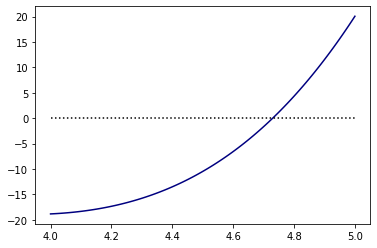

In [27]:
fig, ax = plt.subplots()

f = lambda x: np.cosh(x) * np.cos(x) - 1

x = np.linspace(4, 5, 100)
ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, (lambda x: 0*x)(x), color="black", linestyle="dotted", label="y = 0")
plt.show()

Now, with the knowledge that the interval $(4, 5)$ is reasonable, we can use the Newton-Raphson method to estimate $x_*$, this root of $f(x)$. Based on the graph, we can even begin with a guess of $x_0 = 4.6$; we also set $\epsilon = 0.0001$, where we stop iterating with the Newton-Raphson method when $|x_{k+1} - x_k| < \epsilon$. 

In [28]:
from sympy import *

# Here, we use sympy to calculate the derivative of f(x)
z = Symbol('z')
y = cosh(z) * cos(z) - 1
y_prime = y.diff(z)

f = lambdify(z, y)
f_prime = lambdify(z, y_prime)

eps = 0.0001

def newton_raphson(x_0, f, f_prime): 
  x_1 = x_0 - f(x_0) / f_prime(x_0)
  if np.abs(x_1 - x_0) < eps: 
    return x_1
  else: 
    return newton_raphson(x_1, f, f_prime)

print(newton_raphson(4.6, f, f_prime))

4.730040744862724


Thus, we conclude that 

$$x_* = 4.730$$

### Problem 5

We can use the `bisection` method that we wrote from Problem 2 to find the root $x_*$ of $f(x) = \mathrm{tan}(x) - \mathrm{tanh}(x)$. 

In [29]:
f = lambda x: np.tan(x) - np.tanh(x)

print(bisection(7, 7.4, f))

7.068359375


With the above code, we find that 

$$x_* = 7.068$$

### Problem 6

First we will graph $f(x) = sin(x) + 3cos(x) - 2$ over the interval $(-2, 2)$ to determine appropriate guesses with which to begin the Newton-Raphson method for each of the two roots. 

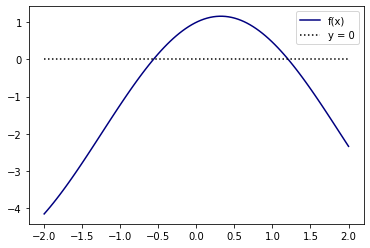

In [30]:
fig, ax = plt.subplots()

f = lambda x: np.sin(x) + 3 * np.cos(x) - 2

x = np.linspace(-2, 2, 100)

ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, (lambda x: 0*x)(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
plt.show()

Based on the graph, it would seem that appropriate first guesses for the negative root $x_1^*$ and the positive root $x_2^*$ are $-1.0$ and $1.0$, respectively. 

In [31]:
# Again, we use sympy to calculate the derivative of f(x)
y = sin(z) + 3 * cos(z) - 2
y_prime = y.diff(z)
f_prime = lambdify(z, y_prime)

x_1 = newton_raphson(-1.0, f, f_prime)
x_2 = newton_raphson(1.0, f, f_prime)

print('x_1^* =', x_1)
print('x_2^* =', x_2)

x_1^* = -0.5643265693959771
x_2^* = 1.2078276781892563


Thus, 

$$x_1^* = -0.564$$

and 

$$x_2^* = 1.208$$

### Problem 7

First, we write an algorithm to perform the secant method. We again use $\epsilon = 0.0001$, where we stop iterating when $|x_k - x_{k+1}| < \epsilon$. 

In [32]:
# f has already been apporpriately defined in the code for problem 6

def secant(x_1, x_2, f):
  x_3 = x_2 - f(x_2) * (x_2 - x_1) / (f(x_2) - f(x_1))
  if np.abs(x_2 - x_3) < eps:
    return x_3
  else: 
    return secant(x_2, x_3, f)

print("x_1^* =", secant(-1, -0.5, f))
print("x_2^* =", secant(1, 1.5, f))

x_1^* = -0.5643265693150802
x_2^* = 1.2078276582927392


Thus, using the secant method — and guesses of $-1$ and $-0.5$ for $x_1^*$ and $1$ and $1.5$ for $x_2^*$, all four based on the graph from problem 6 — we find again that 

$$x_1^* = -0.564$$

and 

$$x_2^* = 1.208$$

### Problem 8

[]

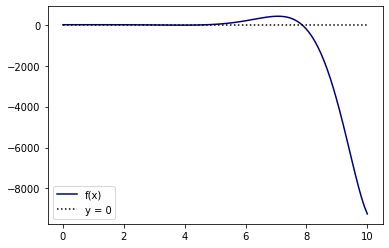

In [33]:
f = lambda x: np.cosh(x) * np.cos(x) - 1

fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, (lambda x: 0*x)(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
plt.plot()

To verify that the smallest positive, non-zero root of $f(x)$ is in the interval $(4, 5)$, we rescale the axes of the above graph.

[]

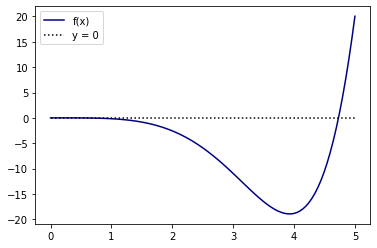

In [34]:
fig, ax = plt.subplots()

# We adjust the parameters of np.linspace to condense the domain x
x = np.linspace(0, 5, 100)
ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, (lambda x: 0*x)(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
plt.plot()

To confirm that $f(x)$ does not cross the x-axis in the interval $(0,1)$, we once again rescale the axes of the graph. 

[]

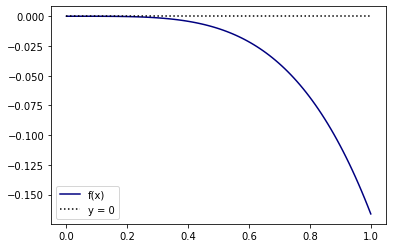

In [35]:
fig, ax = plt.subplots()

# We once again adjust the parameters of np.linspace
x = np.linspace(0, 1, 100)
ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, (lambda x: 0*x)(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
plt.plot()

The behavior of the above three graphs suggest that as $x \to 0^+$, $f(x) \to 0$, and that $f(x)$ does not cross the axis in the interval $(0,4)$. 

Now, we will show graphically that the Newton-Raphson method would not converge if it started with $4$. We will calculate the first 7 iterations of the Newton-Raphson method (the number of iterations it takes for us to reach the point where $|x_k - x_{k+1}| < \epsilon = 0.0001$), plot these points, and then plot the lines tangent to the graph of $f(x)$ at these points that are used in the Newton-Raphson method.

[]

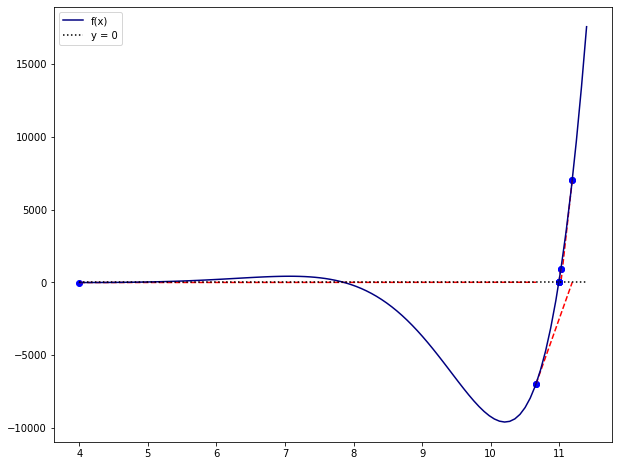

In [36]:
z = Symbol('z')
y = cosh(z) * cos(z) - 1
y_prime = y.diff(z)
f_prime = lambdify(z, y_prime)

fig, ax = plt.subplots() 

def newton_raphson(x_0, f, f_prime): 
  ax.plot(x_0, f(x_0), "bo")
  x_1 = x_0 - f(x_0) / f_prime(x_0)
  if np.abs(x_1 - x_0) < eps: 
    ax.plot(x_1, f(x_1), "bo")
    x = np.linspace(x_0, x_1, 100)
    ax.plot(x, (lambda x: f_prime(x_0) * (x - x_0) + f(x_0))(x), color="red", linestyle="dashed")
    return x_1
  else: 
    ax.plot(x_1, f(x_1), "bo")
    x = np.linspace(x_0, x_1, 100)
    ax.plot(x, (lambda x: f_prime(x_0) * (x - x_0) + f(x_0))(x), color="red", linestyle="dashed")
    return newton_raphson(x_1, f, f_prime)

res = newton_raphson(4, f, f_prime)

x = np.linspace(4, 11.4, 100)
ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, (lambda x: 0*x)(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
fig.set_size_inches(10,8)
plt.plot()

(Note that the dashed red lines in the graph above are the tangent lines used in the Newton-Raphson approximation method.)

As the graph above shows, the Newton-Raphson method converges to the root that is close to $x = 11$ if begun with $4$, not the smallest positive, non-zero root that we were actually seeking to find. 

### Problem 12

We begin by plotting $f(x) = x^4 + 0.9x^3 -2.3x^2 + 3.6x - 25.2$ to determine the whereabouts of its roots.

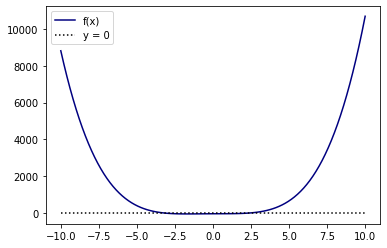

In [37]:
fig, ax = plt.subplots() 

f = lambda x: x**4 + 0.9 * x**3 - 2.3 * x**2 + 3.6 * x - 25.2

x = np.linspace(-10,10,100)

ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, (lambda x: 0*x)(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
plt.show()

Now, we rescale the axes to get a better idea of where the roots are. 

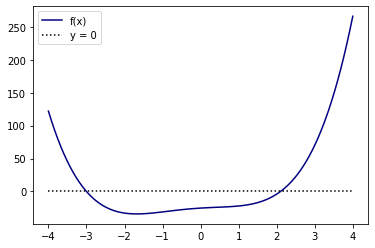

In [38]:
fig, ax = plt.subplots()

x = np.linspace(-4,4,100)

ax.plot(x, f(x), color="navy", linestyle="solid", label="f(x)")
ax.plot(x, (lambda x: 0*x)(x), color="black", linestyle="dotted", label="y = 0")
ax.legend()
plt.show()

The above graphs show that $f(x)$ has two roots, the first, $x_1^*$, in the interval $(-3.5, 2.5)$, and the second, $x_2^*$, in the interval $(2, 3)$. We can use the bisection method to approximate the values of each of these roots. 

In [39]:
print("x_1^* =", bisection(-3.5, -2.5, f))

print("x_2^* =", bisection(2,3,f))

x_1^* = -3.0
x_2^* = 2.10009765625


Thus, we find that 

$$x_1^* = -3$$

and 

$$x_2^* = 2.100$$